In [3]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt

In [4]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\DMQA\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
df1 = pd.read_csv('C:/Users/DMQA/DATA1.csv', encoding = 'euc-kr')
df2 = pd.read_csv('C:/Users/DMQA/DATA2.csv', encoding = 'euc-kr')

In [6]:
df1.head()[:2]

,rc_date,name,ord,ord_group,review1,review2,review3,review4,review5,review6,review7,review8,pre_date1,pre_date2,pre_date3,pre_date4
0,20201205,디바인플라이,8,0,선두권 내측/결승선 250미터 앞 선두 싸움 밀리고 후미 처짐,주행심사: 경주능력부진(1위마와 32.2 마신차),중반이후 격차좁히나 직선 걸음 무뎌지며 처짐,외곽 선두 추격/직선 외곽 채찍 따라가나 점점 후미 처짐,0,0,0,0,20201127,20200823,20200808,20200731
1,20201205,올하트,13,0,선행마 후미권 각축후 직선 선두나 막판 덜미,후미출발후 시종 순위좁혔으나 직선 지친모습,합격유보-출발불량,0,0,0,1.7초 늦발/초반 밋밋한 모습 으로 후미 위치하여 내측에서 따라가나 3코너 진입후...,0,20200816,20200712,20200612,0


In [7]:
df2.head()[:2]

,review,ord,ord_group
0,주행중지: 출발후 약 200M 지점 기수 낙마,92,0
1,후미권 이끌었고 직선 순위도약 시도나 추입력 발휘안돼 고전,7,0


In [8]:
list_df2 = np.array(df2['review'].tolist())
print(list_df2)

['주행중지: 출발후 약 200M 지점 기수 낙마' '후미권 이끌었고 직선 순위도약 시도나 추입력 발휘안돼 고전'
 '선행으로 경주를 주도했으나 직선막판 근소한 차이로 덜미잡혀' ... '선두권 후미공략이나 직선 강한모습을 못보여줌'
 '(스포츠조선배)-후미권에서 순위좁히지못해' '후미권 이끌며 순위도약을 노렸으나 직선지친모습']


In [9]:
okt = Okt()

In [10]:
text = '선행으로경주를주도했으나직선막판근소한차이로덜미잡혀'
print(okt.morphs(text))

['선행', '으로', '경주', '를', '주도했으나', '직선', '막판', '근소', '한', '차이', '로', '덜미', '잡혀']


In [11]:
nouns_review_df2 = []
for text in list_df2 : 
    nouns_review_df2.append(okt.nouns(text))

In [12]:
morphs_review_df2 = []
for text in list_df2 : 
    morphs_review_df2.append(okt.morphs(text))

In [13]:
print(nouns_review_df2[0:4])

[['주행', '중지', '출발', '후', '약', '지점', '기수', '낙마'], ['후미', '직선', '순위', '도약', '시도', '추', '입력', '발휘', '고전'], ['선행', '경주', '직선', '막판', '근소', '차이', '덜미'], ['전반', '후미', '못', '모습']]


In [14]:
print(morphs_review_df2[0:4])

[['주행', '중지', ':', '출발', '후', '약', '200', 'M', '지점', '기수', '낙마'], ['후미', '권', '이끌었고', '직선', '순위', '도약', '시도', '나', '추', '입력', '발휘', '안', '돼', '고전'], ['선행', '으로', '경주', '를', '주도했으나', '직선', '막판', '근소', '한', '차이', '로', '덜미', '잡혀'], ['경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습']]


In [83]:
import itertools

list_corpus = []
for x in morphs_review_df2 :
    list_corpus.append(x)
    
merged_c = list(itertools.chain.from_iterable(list_corpus))
print(merged_c)

['주행', '중지', ':', '출발', '후', '약', '200', 'M', '지점', '기수', '낙마', '후미', '권', '이끌었고', '직선', '순위', '도약', '시도', '나', '추', '입력', '발휘', '안', '돼', '고전', '선행', '으로', '경주', '를', '주도했으나', '직선', '막판', '근소', '한', '차이', '로', '덜미', '잡혀', '경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습', '선두', '권', '을', '압박', '하며', '따라갔으나', '4', '코너', '부터', '격차', '벌어지며', '고', '전함', '경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습', '출발', '무난', '/', '내', '측', '이', '동', '선두', '추격', '/', '직선', '중앙', '선두', '권', '가담', '/', '꾹', '잡고', '따라만', '감', '선행마', '후미', '를', '따라가며', '기회', '노렸으나', '직선', '근소', '한', '차이', '로', '덜미', '경', '주', '전반', '에', '걸쳐', '후미', '권', '을', '벗어나지', '못', '하고', '따라가는', '모습', '출발', '무난', '/', '선입', '권', '중앙', '/', '4', 'C', '외곽', '선회', '/', '직선', '채찍', '섞으면', '석', '격차', '좁혀', '감', '출발', '무난', '/', '밀어', '선두', '권', '중앙', '/', '직선', '2', '위', '권', '싸움', '밀리', '지', '않아', '밀어', '끝', '유지', '초반', '선입', '권', '가담', '이나', '2', '코너', '이후', '순위', '밀려', '직선', '후미', '권

In [105]:
from collections import Counter

count = Counter(merged_c)
morphs_list = count.most_common(20)
print(morphs_list)

[('직선', 4716), ('후미', 3008), ('권', 2794), ('선두', 2085), ('/', 1479), ('전개', 1472), ('시종', 1223), ('걸음', 1216), ('출발', 1051), ('탄력', 1049), ('선입', 988), ('이나', 904), ('나', 883), ('격차', 869), ('채찍', 862), ('중위', 796), ('후', 778), ('경주', 757), ('못', 732), ('착', 716)]


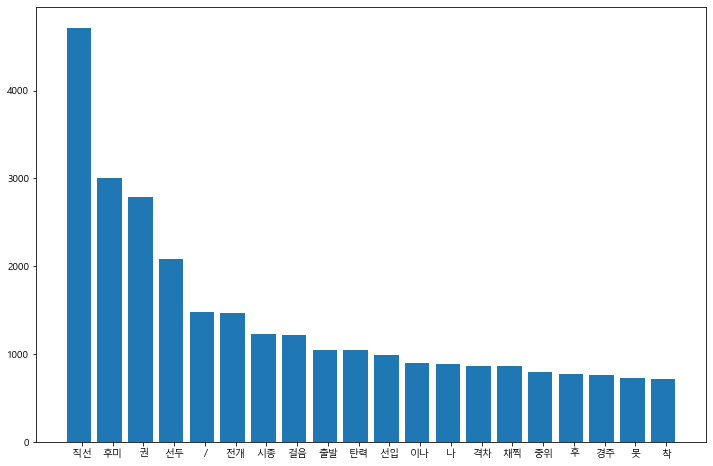

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

labels, values = zip(*morphs_list)
indexes = np.arange(len(labels))
width = 1

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(indexes, values,width=[0.8],align='edge')
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [91]:
ccorpus = []
for x, y in zip(morphs_review_df2, df2['ord']) :
    ccorpus.append([x,y])
col_name = ['Review', 'Ord']
df_c = pd.DataFrame(ccorpus, columns=col_name)
df_c

,Review,Ord
0,"[주행, 중지, :, 출발, 후, 약, 200, M, 지점, 기수, 낙마]",92
1,"[후미, 권, 이끌었고, 직선, 순위, 도약, 시도, 나, 추, 입력, 발휘, 안,...",7
2,"[선행, 으로, 경주, 를, 주도했으나, 직선, 막판, 근소, 한, 차이, 로, 덜...",2
3,"[경, 주, 전반, 에, 걸쳐, 후미, 권, 을, 벗어나지, 못, 하고, 따라가는,...",10
4,"[선두, 권, 을, 압박, 하며, 따라갔으나, 4, 코너, 부터, 격차, 벌어지며,...",6
...,...,...
7284,"[게이트, 극복, 하며, 선행, 탄력, 유지, 우승]",1
7285,"[시종, 후미, 직선, 탄력, 큰, 변화, 아님]",9
7286,"[선두, 권, 후미, 공략, 이나, 직선, 강한, 모습, 을, 못, 보여줌]",6
7287,"[(, 스포츠조선, 배, )-, 후미, 권, 에서, 순위, 좁히지못해]",5


In [95]:
grouped = df_c.groupby('Ord')

In [112]:
for i in grouped :
    print(i)

(0,                                                  Review  Ord
6     [출발, 무난, /, 내, 측, 이, 동, 선두, 추격, /, 직선, 중앙, 선두,...    0
9     [출발, 무난, /, 선입, 권, 중앙, /, 4, C, 외곽, 선회, /, 직선,...    0
10    [출발, 무난, /, 밀어, 선두, 권, 중앙, /, 직선, 2, 위, 권, 싸움,...    0
19    [중위, 권, 최선, 전개, 나, 직선, 주로, 추격, 허용, 하며, 조금, 밀려, 남]    0
25    [출발, 무난, /, 밀어선, 입, →, 선두, 8, 외곽, 붙음, /, 직선, 강...    0
...                                                 ...  ...
7095  [외곽, 선두, 추격, /, 직선, 5, 견제, 후, 경합, 채찍, 독려, 하며, ...    0
7096  [선입, 내, 측, /, 직선, 선두, 쳐다보며, 두어, 차례, 채찍, 후, 밀어,...    0
7097  [선입, 내, 측, /, 직선, 10, 경합, 채찍, 밀고, 끝, 유지, 했으나, ...    0
7098   [선두, /, 직선, 선두, 나오며, 별다른, 동작, 없이, 꾹, 잡고, 걸음, 유지]    0
7099        [선행, 으로, 경, 주, 주도, 나, 직선, 덜미, 잡혀, 2, 착, 만족]    0

[1991 rows x 2 columns])
(1,                                                  Review  Ord
17     [선두, 권, 을, 압박, 하다, 직선, 걸음, 발휘, 막판, 선두, 로, 부상, 함]    1
32     [선행, 으로, 경주, 를, 주도했고, 시종, 선두, 를, 유지, 하며, 우승, 성공]    1
34       [선입, 권, 전개, 하다, 직선, 막판, 선두, 마, 덜미, 잡고, 우승,